<a href="https://colab.research.google.com/github/urness/CS167Code/blob/main/Day07_Notes_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs! 
Let's take a look at how to plot data in a iPython Notebook:

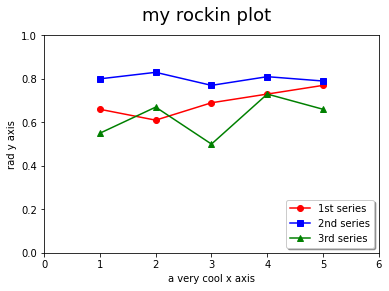

In [1]:
import matplotlib.pyplot as plt

#lets start by making up some data
xvals = [1,2,3,4,5]
series1 = [.66,.61,.69,.73,.77]
series2 = [.8,.83,.77,.81,.79]
series3 = [.55,.67,.5,.73,.66]

#add names for the graph and axes
plt.suptitle('my rockin plot',fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('rad y axis')

#and plot our series
plt.plot(xvals,series1,'ro-',label='1st series')
plt.plot(xvals,series2,'bs-',label='2nd series')
plt.plot(xvals,series3,'g^-',label='3rd series')

# add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 6, 0, 1]) ## 0 to 6 in x-dimension; 0 to 1 in y-dimension
plt.show()

In [2]:
#Now, let's plot something about our data.
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

#load in the data
life_expectancy = pandas.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/LifeExpectancyData.csv') #change this line to point to your data

#work with a subset of the data
developed_countries = life_expectancy[life_expectancy['Status'] == "Developed"]
developed_countries.shape



(512, 22)

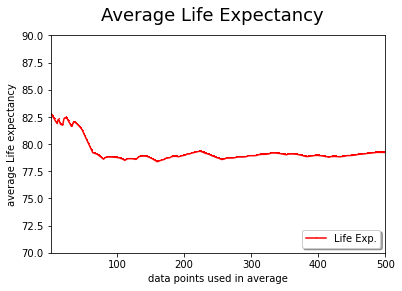

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# a silly function that returns the average life expectancy for the first k countries in the dataframe
def getAverageLifeExpect(data,k):
    return data["Life expectancy"].iloc[0:k].mean()

number_of_points = 500

# populate the series list
series = []
for i in range(1,number_of_points):
    val = getAverageLifeExpect(developed_countries,i)
    series.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Average Life Expectancy',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('average Life expectancy')
plt.plot(xvals,series,'r,-',label='Life Exp.')
plt.legend(loc='lower right', shadow=True)

plt.axis([1, number_of_points, 70, 90])
plt.show()

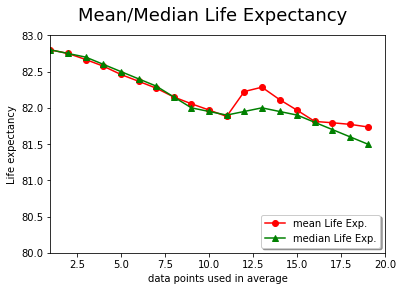

In [11]:
# exercise:

import matplotlib.pyplot as plt
%matplotlib inline

# a silly function that returns the average life expectancy for the first k countries in the dataframe
def getAverageLifeExpect(data,k):
    return data["Life expectancy"].iloc[0:k].mean()

def getMedianLifeExpect(data,k):
    return data["Life expectancy"].iloc[0:k].median()

number_of_points = 20

# populate the series list
series = []
series2 = []
for i in range(1,number_of_points):
    val = getAverageLifeExpect(developed_countries,i)
    series.append(val)
    val = getMedianLifeExpect(developed_countries,i)
    series2.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Mean/Median Life Expectancy',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('Life expectancy')
plt.plot(xvals,series,'ro-',label='mean Life Exp.')
plt.plot(xvals,series2,'g^-',label='median Life Exp.')

plt.legend(loc='lower right', shadow=True)

plt.axis([1, number_of_points, 80, 83])
plt.show()




# Metrics and Testing
Let's use the iris dataset and see how accurate our kNN model is.

In [4]:
data = pandas.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/irisData.csv') #change this line to point to your data
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

In [54]:
test_data.head()

,sepal length,sepal width,petal length,petal width,species
119,6.0,2.2,5.0,1.5,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica


In [25]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
shuffled_data.head()

,sepal length,sepal width,petal length,petal width,species
119,6.0,2.2,5.0,1.5,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica


In [48]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [35]:
classify_kNN(test_data.iloc[0], train_data,5)

'Iris-virginica'

In [37]:
test_data.iloc[0].species

'Iris-virginica'

In [49]:
def accuracy(actual,predicted):
    #return the percentage of predicted/actual that match
    num_correct = 0
    for i in range(len(actual)):
      if actual.iloc[i] == predicted.iloc[i]:
        num_correct +=1
    frac_correct = num_correct/len(actual)
    return frac_correct

In [50]:
def classify_all_kNN(test_data,train_data,k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    #return test_data.apply(classify_kNN,args=(train_data,k),axis=1)
    results = []
    for i in range(len(test_data)):
      prediction = classify_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)
    

In [51]:
predictions5NN = classify_all_kNN(test_data,train_data,5)
#predictions5NN
test_data['species']

119     Iris-virginica
128     Iris-virginica
135     Iris-virginica
91     Iris-versicolor
112     Iris-virginica
71     Iris-versicolor
123     Iris-virginica
85     Iris-versicolor
147     Iris-virginica
143     Iris-virginica
127     Iris-virginica
39         Iris-setosa
38         Iris-setosa
93     Iris-versicolor
23         Iris-setosa
133     Iris-virginica
30         Iris-setosa
83     Iris-versicolor
37         Iris-setosa
41         Iris-setosa
Name: species, dtype: object

In [ ]:
test_data['species'].reset_index(drop=True)

In [ ]:
predictions5NN = classify_all_kNN(test_data,train_data,5)
print('ACTUAL\t\tPREDICTIONS')
for i in range(20):
    print(test_data['species'].iloc[i], "  ", predictions5NN.iloc[i] )

acc = accuracy(test_data['species'],predictions5NN)
print("accuracy:", acc)

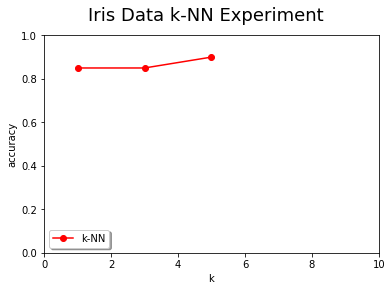

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/irisData.csv')

shuffled_data = data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]


k_vals = [1,3,5]
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,10,0,1])

plt.show()

In [ ]:
# exercise:
# add more points: add multiple values of k to the graph 
# explain the phenomenon that you observe